In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Unity Env setup

In [2]:
from unityagents import UnityEnvironment

In [3]:
env = UnityEnvironment(file_name = "Reacher.app", no_graphics = True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])  

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


# Agent imports


In [15]:
import os
import sys
import numpy as np
import torch 

sys.path.append('src')
from ddpg_agent import DdpgAgent
from utils import train_agent, plot_scores_losses

## Create Agent 



In [16]:
BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 128         # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters               
LR_ACTOR = 1e-4         # learning rate of the actor 
LR_CRITIC = 1e-4        # learning rate of the critic

UPDATE_EVERY = 1        # how often to update the network
WEIGHT_DECAY = 1e-2

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

agent = DdpgAgent(state_size  = state_size, 
                 action_size = action_size, 
                 num_agents = num_agents,
                 seed=2,
                 batch_size=BATCH_SIZE,
                 buffer_size=BUFFER_SIZE,
                 actor_lr=LR_ACTOR,
                 critic_lr=LR_CRITIC,
                 weight_decay=WEIGHT_DECAY,
                 tau=TAU,
                 update_every=UPDATE_EVERY,
                 gamma = GAMMA,
                 device = device,
                 checkpoint_dir = "checkpoints")

In [17]:
train_agent(num_agents, agent, env, 
                      target_mean_score=30.0, 
                      file_prefix="new_solution", 
                      n_episodes=200)

ERROR:root:Exception calling application: Ran out of input
Traceback (most recent call last):
  File "/Users/cab/anaconda3/envs/drl_nav/lib/python3.6/site-packages/grpc/_server.py", line 385, in _call_behavior
    return behavior(argument, context), True
  File "/Users/cab/anaconda3/envs/drl_nav/lib/python3.6/site-packages/unityagents/rpc_communicator.py", line 26, in Exchange
    return self.child_conn.recv()
  File "/Users/cab/anaconda3/envs/drl_nav/lib/python3.6/multiprocessing/connection.py", line 251, in recv
    return _ForkingPickler.loads(buf.getbuffer())
EOFError: Ran out of input


KeyError: 'ReacherBrain'

Episode 10	Average Score: 0.32


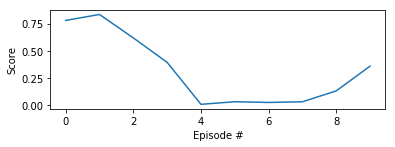

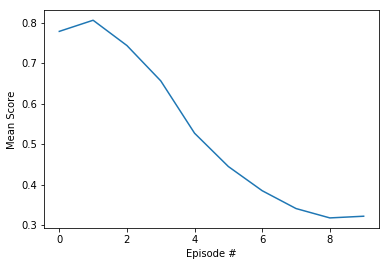

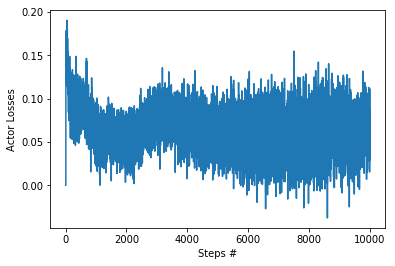

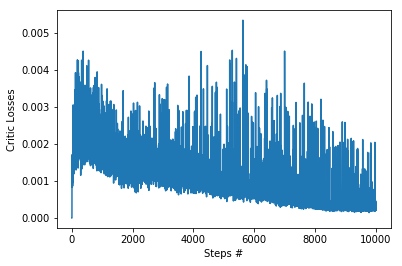

Episode 20	Average Score: 0.41


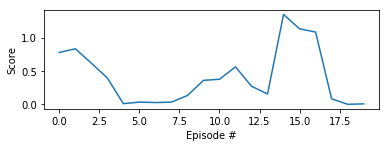

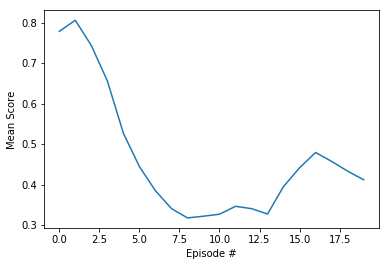

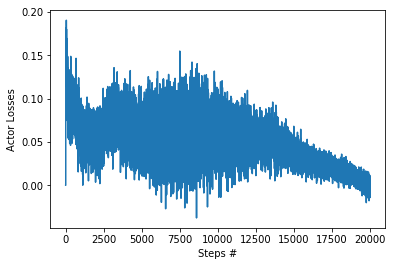

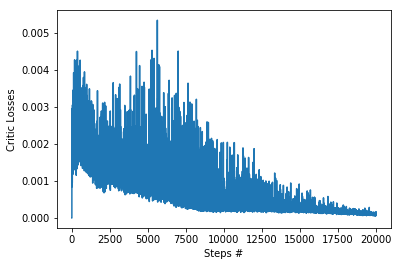

Episode 30	Average Score: 0.28


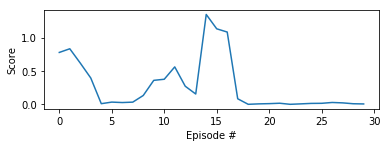

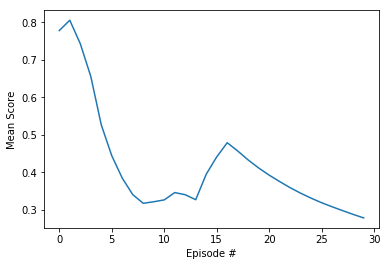

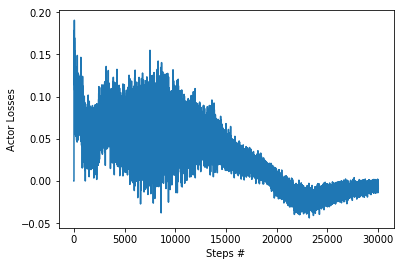

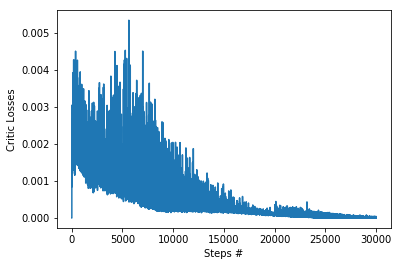

In [ ]:
train_agent(num_agents, agent, env, 
                      target_mean_score=30.0, 
                      output_weights="final_weights.pth", 
                      n_episodes=200)